In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

file = '../publication_database.csv'

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('oomphacite')
model_names

['zhang_19_oomph', 'Liu_19_oomph']

# Exploring Pyrrhenious's Oomphacite Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

 * Zhang et al., 2019. Electrical Conductivity of Omphacite as a Function of Water Content and Implications for High Conductivity Anomalies in the Dabie-Sulu UHPM Belts and Tibet
  
 * Liu et al., 2019. Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content
  
Zhang's reported model does not correspond to either the graph or the data! Attempts to adjust the constants revealed that they just don't report enough data to give a fit. A major issue was that the equation does not work at zero iron fraction. Adding a small amount of iron fraction (1e-4) seems to result in 'Fe 

## Zhang et al., 2019

['Electrical Conductivity of Omphacite as a Function of Water Content and Implications for High Conductivity Anomalies in the Dabie-Sulu UHPM Belts and Tibet']
oomphacite


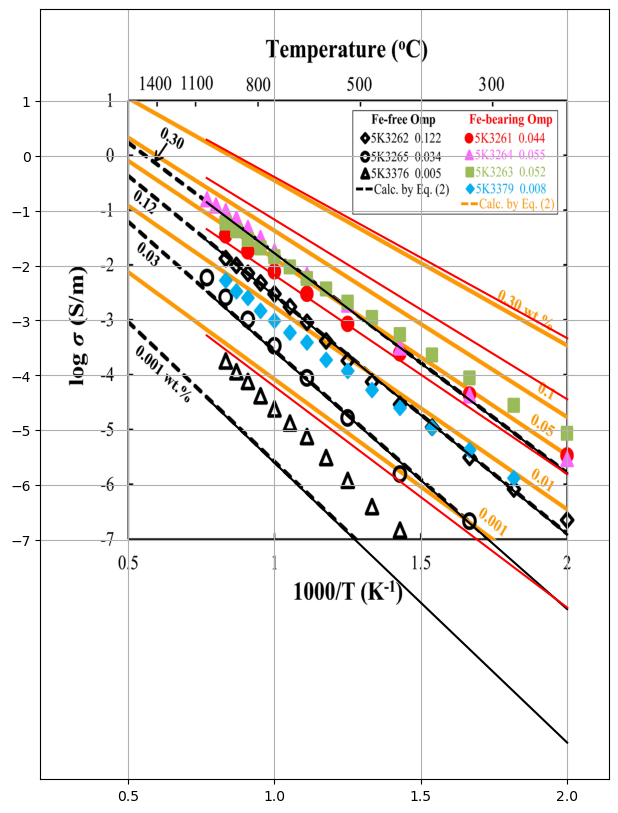

In [2]:
model = 'zhang_19_oomph'
wtfeo     = [0,        0,    0, 0.74, 0.70, 0.72,  0.78]
wtmgo     = [1,        1,    1, 1.88, 1.68, 1.81,  1.57]
Cw      =   [0.122, 0.034,0.005,0.044,0.052,0.055,0.008]
sigma_0 =   [47.1,  33.7, 2.5, 20.2, 28.5, 130.8, 4.42]
ev      = [0.85,0.99,1.01,0.68,0.66,0.77,0.72]
df = pd.DataFrame(dict(feo=wtfeo,mgo=wtmgo,sigma_0=sigma_0,water=Cw,ev=ev))
df['Xfe'] = df['feo']/(df['feo']+df['mgo'])
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['title'].values)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, '../publication_images')
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for w in [0.001,0.03,0.12,0.3]: 
        c1 = model.get_conductivity(X_fe=0,Cw=w*1e4,T=temperature_range)
        ax.plot(1e3/temperature_range,np.log10(c1),color='black')
    for w in [0.001,0.03,0.12,0.3]: 
        c2 = model.get_conductivity(X_fe=0.3,Cw=w*1e4,T=temperature_range)
        ax.plot(1e3/temperature_range,np.log10(c2),color='red')
    


## Liu et al., 2019

['Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content']
oomphacite


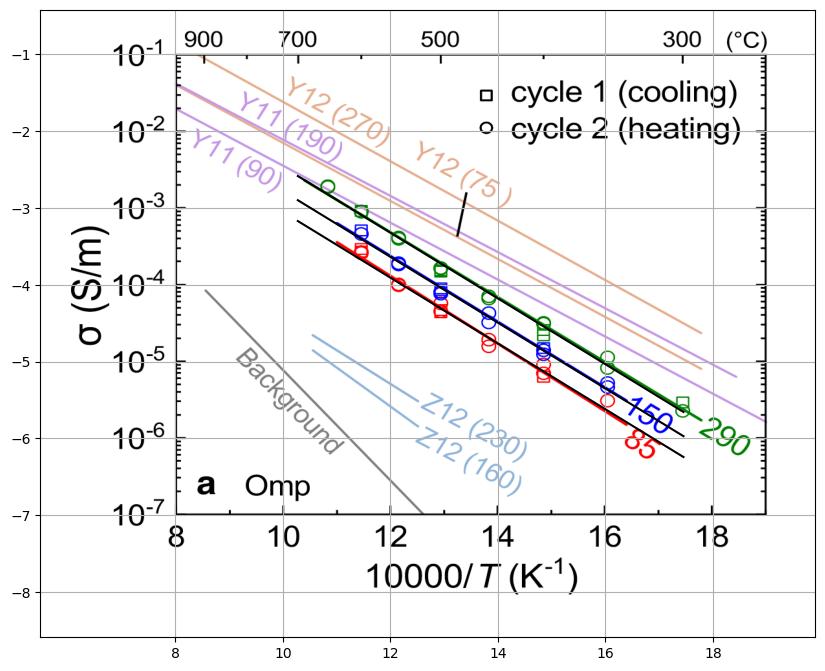

In [3]:
model = 'Liu_19_oomph'
water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties('Liu_19_oomph')
print(ec_model_row['title'].values)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for w in [85,150,290]: 
        c1 = model.get_conductivity(X_fe=0,Cw=w,T=temperature_range)
        ax.plot(1e4/temperature_range,np.log10(c1),color='black')
   